# Face Detection with OpenCV DNN (Using a Pre-trained CNN)

This notebook demonstrates how to perform **face detection** using OpenCV's Deep Neural Network (DNN) module.  
We use a pre-trained model from the **Single Shot Multibox Detector (SSD)** framework with a backbone based on a **Convolutional Neural Network (CNN)**.

---

### 🔍 Why CNN?
The model used here — `res10_300x300_ssd_iter_140000_fp16.caffemodel` — is a CNN-based face detector trained on large datasets like **WIDER FACE**.

- **Convolutional Neural Networks (CNNs)** are specialized neural networks for processing grid-like data such as images. They extract hierarchical spatial features.
- The SSD head predicts face locations and confidence scores directly from the feature maps, allowing **fast and accurate detection**.
- The whole model processes the image in a **single forward pass**, making it suitable for real-time applications.

---

### 🧠 Model Files
- `deploy.prototxt`: Defines the CNN architecture (layers, kernel sizes, activations, etc.).
- `res10_300x300_ssd_iter_140000_fp16.caffemodel`: Contains the pre-trained weights learned from data.

We will:
1. Load the model,
2. Read an input image,
3. Detect faces with confidence > 0.7,
4. Draw bounding boxes and confidence scores.


## Step 1: Import Libraries

- `cv2`: The OpenCV library, used for image loading, processing, and deep learning inference.
- `matplotlib.pyplot`: Used for displaying images inside the Jupyter Notebook (instead of using OpenCV's GUI which may not work in notebooks).


In [1]:
import cv2
import matplotlib.pyplot as plt

## Step 2: Load the Pre-trained CNN Model

We load the model using `cv2.dnn.readNetFromCaffe()`, which takes in:
- `deploy.prototxt`: The model structure.
- `res10_300x300_ssd_iter_140000_fp16.caffemodel`: The trained weights.

This model is a **Single Shot Detector** with a ResNet-10 backbone that has been trained specifically for face detection.


In [2]:
# Load the pre-trained DNN model
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000_fp16.caffemodel")


## Step 3: Load the Input Image

- We load the image using `cv2.imread()`.
- If the file path is wrong or the image is missing, we print an error message.
- This image will later be passed through the CNN for face detection.


In [15]:
# Change this to your image path
image_path = "image/groupPhoto.jpg"

# Read the image
frame = cv2.imread(image_path)

# Check if the image is read correctly
if frame is None:
    print("❌ Could not read image. Please check the path.")
else:
    print("✅ Image loaded successfully.")


✅ Image loaded successfully.


## Step 4: Perform Face Detection

- We preprocess the image into a blob — a 4D array the model expects — using `cv2.dnn.blobFromImage`.
- We feed the blob into the CNN using `net.setInput()` and run a forward pass with `net.forward()` to get detections.
- Each detection includes a **confidence score** and a **bounding box** (x1, y1, x2, y2), which are scaled back to the image's dimensions.
- Only detections with confidence above **0.7** are visualized.

### 🧠 Why convert to blob?
Blob conversion normalizes pixel values and resizes the image to 300x300 (the model's expected input size).


In [16]:
if frame is not None:
    frame_height, frame_width = frame.shape[:2]

    # Create a blob and set it as input to the network
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), [104, 117, 123], swapRB=False, crop=False)
    net.setInput(blob)
    detections = net.forward()

    # Loop through detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:
            x1 = int(detections[0, 0, i, 3] * frame_width)
            y1 = int(detections[0, 0, i, 4] * frame_height)
            x2 = int(detections[0, 0, i, 5] * frame_width)
            y2 = int(detections[0, 0, i, 6] * frame_height)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"Confidence: {confidence:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)


## Step 5: Display the Output

- OpenCV reads images in **BGR** format, but `matplotlib` expects **RGB** — so we convert the image using `cv2.cvtColor`.
- Finally, we display the image with bounding boxes and confidence labels using `matplotlib.pyplot`.

🎯 You should now see green boxes around detected faces with confidence scores above 0.7.


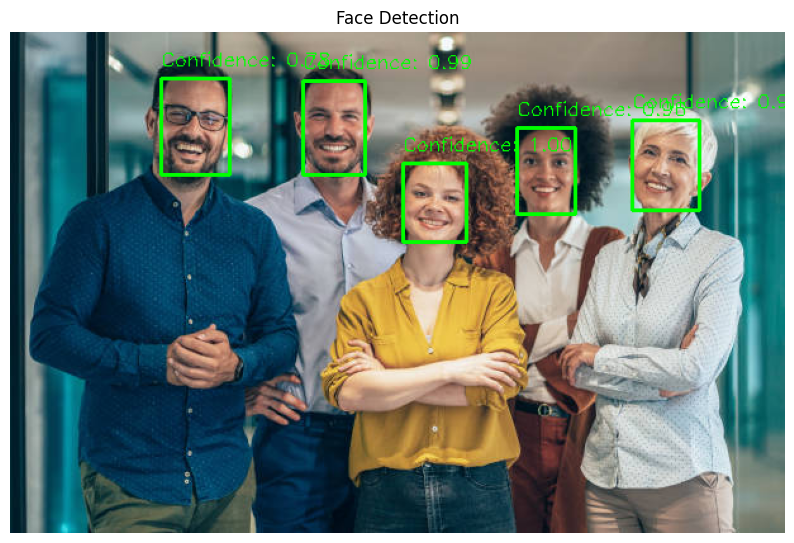

In [17]:
if frame is not None:
    # Convert image from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the image with matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.title("Face Detection")
    plt.show()
